# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 9. Байесовские классификаторы.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

Цель - построить систему, автоматически классифицирующую поступающие новостные сюжеты на несколько заранее заданных категорий.


С помощью кода ниже загрузим встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.

In [3]:
# удаляем заголовки и подписи
remove = ('headers', 'footers')
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(
    subset='train', shuffle=True, random_state=random_state, remove=remove
)
data_test = fetch_20newsgroups(
    subset='test', shuffle=True, random_state=random_state, remove=remove
)

Посмотрим на какое-нибудь сообщение

In [4]:
print(data_train['data'][21])

In article <1993Apr20.151818.4319@samba.oit.unc.edu> Scott.Marks@launchpad.unc.edu (Scott Marks) writes:
>>And of course, Mike Ramsey was (at one time) the captain in Buffalo prior to
>>being traded to Pittsburgh.  Currently, the Penguins have 3 former captains
>>and 1 real captain (Lemieux) playing for them.  They rotate the A's during the
>>season (and even the C while Mario was out).  Even Troy Loney has worn the C
>>for the Pens.
>

I think that Mike Foligno was the captain of the Sabres when he
got traded to the Leafs. Also, wasn't Rick Vaive the captain of
the Leafs when he got traded to Chicago (with Steve Thomas for
Ed Olcyzk and someone). Speaking of the Leafs, I believe that
Darryl Sittler was their captain (he'd torn the "C" off his
jersey but I think he re-claimed the captaincy later on) when he
was traded to the Flyers.

Oh yeah, of course, Gretzky was the captain of the Oilers before
he was traded wasn't he? 


Индекс тематической группы для каждого сообщения

In [5]:
data_train['target']

array([7, 4, 4, ..., 3, 1, 8])

Названия тематических групп

In [6]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Построим классификатор новостных сюжетов на тематические группы. Разделим обучающую выборку на две части: обучающую и валидационную. 

In [7]:
df = pd.DataFrame(data_train.data)
df.columns =['text']
df['target'] = data_train.target 
train, validate = train_test_split(df, train_size=0.66, random_state=42)
counts = pd.value_counts(train['target'], sort=True)
counts

10    408
9     405
5     403
1     399
15    393
6     393
13    392
2     391
14    390
12    386
3     386
8     381
7     380
11    380
4     378
17    375
16    347
0     329
18    299
19    252
Name: target, dtype: int64

Распределение классов выгялит неплохо

In [8]:
for df in range(1, 10):
    vectorizer = CountVectorizer(min_df= df * 0.001)
    vec_data_train = vectorizer.fit_transform(train['text']).toarray()
    vec_validate = vectorizer.transform(validate['text']).toarray()
    multinomial_nb = MultinomialNB()
    multinomial_nb.fit(vec_data_train, train['target'])
    predictions = multinomial_nb.predict(vec_validate)
    print(df * 0.001, ':' ,accuracy_score(validate['target'], predictions))

0.001 : 0.7936054068105017
0.002 : 0.7722900961788407
0.003 : 0.7717702105536782
0.004 : 0.7582531842994541
0.005 : 0.7423966727319989
0.006 : 0.731219131791006
0.007 : 0.7239407330387315
0.008 : 0.7052248505328828
0.009000000000000001 : 0.6987262802183519


In [47]:
for df in range(1, 8):
    vectorizer = CountVectorizer(min_df= 0.001, max_df = 0.03 + (0.005 * df))
    vec_data_train = vectorizer.fit_transform(train['text']).toarray()
    vec_validate = vectorizer.transform(validate['text']).toarray()
    multinomial_nb = MultinomialNB()
    multinomial_nb.fit(vec_data_train, train['target'])
    predictions = multinomial_nb.predict(vec_validate)
    print(0.03 + (0.005 * df), ':' ,accuracy_score(validate['target'], predictions))

0.034999999999999996 : 0.8024434624382636
0.04 : 0.8014036911879386
0.045 : 0.8001039771250325
0.05 : 0.804003119313751
0.055 : 0.8011437483753574
0.06 : 0.8024434624382636
0.065 : 0.8019235768131011


In [9]:
vectorizer = CountVectorizer(min_df= 0.001)
vec_data_train = vectorizer.fit_transform(train['text']).toarray()
print(len(vectorizer.get_feature_names()))
vectorizer = CountVectorizer()
vec_data_train = vectorizer.fit_transform(train['text']).toarray()
print(len(vectorizer.get_feature_names()))


12080
98876


Заметим, что чем больше слов снизу мы отсекаем, тем хуже результат на валидационной выборке, возможно связано с тем, что в редких словах встречаются отчличтельные для некоторых классов слова. Можно было бы выбрать min_df = 0, но тогда количество слов возрастает в разы, что очень не хорошо сказывается на скорости обучения и нагреве компьютера, поэтому оставим 0.001. при min_df = 0.05 (ну и вообще при его наличии) резульат улучшается, по сравнению с его отсутствие, возможон так как частые слова встречаются во всех типах статей

Подберем теперь параметр alpha

In [12]:
for i in range(10):
    vectorizer = CountVectorizer(min_df= 0.001, max_df = 0.05)
    vec_data_train = vectorizer.fit_transform(train['text']).toarray()
    vec_validate = vectorizer.transform(validate['text']).toarray()
    multinomial_nb = MultinomialNB(alpha = i * 0.1)
    multinomial_nb.fit(vec_data_train, train['target'])
    predictions = multinomial_nb.predict(vec_validate)
    print('alpha=',i * 0.1 , ':' ,accuracy_score(validate['target'], predictions))

/home/shtubbb/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


alpha= 0.0 : 0.7790486093059527
alpha= 0.1 : 0.8060826618144008
alpha= 0.2 : 0.806342604626982
alpha= 0.30000000000000004 : 0.8045230049389135
alpha= 0.4 : 0.8021835196256824
alpha= 0.5 : 0.8001039771250325
alpha= 0.6000000000000001 : 0.7980244346243827
alpha= 0.7000000000000001 : 0.7967247205614765
alpha= 0.8 : 0.7956849493111515
alpha= 0.9 : 0.795165063685989


Выберем alpha = 0.2. Заметим, что при alpha = 0 (без сглаживания) результат намного хуже. Значит сглаживание довольно полезно.

Посчитайте качество на тестовой выборке.

In [48]:
alpha = 0.2
min_df = 0.001
max_df = 0.05
vectorizer = CountVectorizer(min_df= min_df, max_df=max_df)
vec_data_train = vectorizer.fit_transform(train['text']).toarray()
vec_test = vectorizer.transform(data_test['data']).toarray()
multinomial_nb = MultinomialNB(alpha = alpha)
multinomial_nb.fit(vec_data_train, train['target'])

MultinomialNB(alpha=0.2)

In [49]:
predictions = multinomial_nb.predict(vec_test)
print(accuracy_score(data_test['target'], predictions))

0.7327403080191184


попробуем min_df = 0

In [50]:
min_df= 0
vectorizer = CountVectorizer(min_df= min_df, max_df=max_df)
vec_data_train = vectorizer.fit_transform(train['text']).toarray()
vec_test = vectorizer.transform(data_test['data']).toarray()
multinomial_nb = MultinomialNB(alpha = alpha)
multinomial_nb.fit(vec_data_train, train['target'])

MultinomialNB(alpha=0.2)

In [51]:
predictions = multinomial_nb.predict(vec_test)
print(accuracy_score(data_test['target'], predictions))

0.757036643653744


проверим тривиальный классификатор

In [53]:
print(accuracy_score(data_test['target'], [10]*len(data_test['target'])))

0.05297397769516728


Сделайте выводы.
Мои выводы по выбору гиперпараметров сохранились, min_df = 0 и вправду оказался лучше. Классификатор дал хороший результат(как минимум по сравнению с тривиальным(который выбирает самый популярный класс статей)). Действительно редкие слова могут быть полезны, а слишком частые могут мешать

---
### Задача 2.
Пусть $\mathscr{X} = \mathbb{R}^2$ — пространство признаков, $\mathscr{Y} = \{0, 1\}$ — множество классов. Рассматривается квадратичный дискриминантный анализ. Условное распределение $X$ при условии $Y=k$ равно $\mathcal{N}(a_k, \Sigma_k)$. Приведите примеры таких параметров $a_k, \Sigma_k$ и вероятностей $\mathsf{P}(Y = k)$, при которых разделяющая поверхность является
* гиперболой;
* параболой;
* двумя параллельными прямыми;
* двумя пересекающимися прямыми.

In [3]:
import warnings
warnings.simplefilter("ignore")

пересекающиеся прямые

In [52]:
X = [[0.75, 0.75],[0.75,0.25], [0.25, 0.75],[0.25,0.25]]
y = [1, 0, 0, 1]
X = pd.DataFrame(X)

In [53]:
model = QuadraticDiscriminantAnalysis(store_covariance=True)
model.fit(X, y)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [54]:
grid = np.mgrid[0:1:0.002, 0:1:0.002]
_, h, w = grid.shape
grid_labels = model.predict(grid.reshape((2, h*w)).T).reshape(h, w)

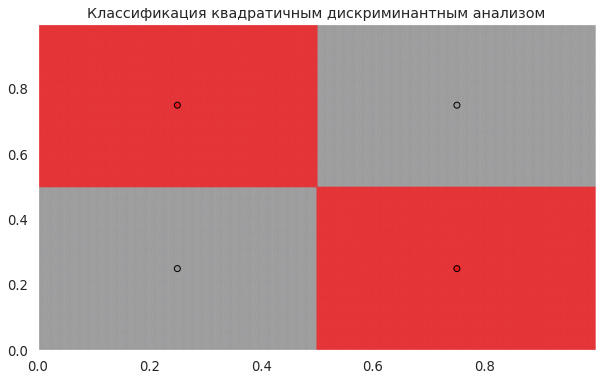

In [55]:
plt.figure(figsize=(10, 6))
plt.pcolormesh(grid[0], grid[1], grid_labels, 
               shading='gouraud', cmap='Set1', alpha=0.2)
plt.scatter(X[0], X[1], c=y, 
            cmap='Set1', edgecolors='black')
plt.title('Классификация квадратичным дискриминантным анализом')
plt.show()

In [56]:
from pprint import pprint  as pp

In [57]:
print('a_k:')
pp( model.means_)
print('матрицы ковариаций:')
pp(model.covariance_)
print('pi_k:')
pp(model.priors_)

a_k:
array([[0.5, 0.5],
       [0.5, 0.5]])
матрицы ковариаций:
[array([[ 0.125, -0.125],
       [-0.125,  0.125]]),
 array([[0.125, 0.125],
       [0.125, 0.125]])]
pi_k:
array([0.5, 0.5])


P(y = k) = 1/2

Две паралленьные

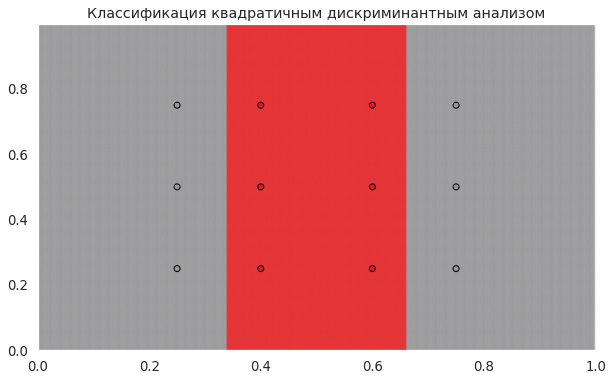

a_k:
array([[0.5, 0.5],
       [0.5, 0.5]])
матрицы ковариаций:
[array([[0.012, 0.   ],
       [0.   , 0.05 ]]),
 array([[0.075, 0.   ],
       [0.   , 0.05 ]])]
pi_k:
array([0.5, 0.5])


In [58]:
X = [[0.25, 0.75],[0.25,0.25], [0.25, 0.5], [0.6, 0.25],[0.4, 0.25],[0.4, 0.5],[0.6, 0.5], [0.4, 0.75] , [0.6, 0.75],[0.75, 0.75],[0.75,0.25], [0.75, 0.5]]
y = [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1]
X = pd.DataFrame(X)
model = QuadraticDiscriminantAnalysis(store_covariance=True)
model.fit(X, y)
grid_labels = model.predict(grid.reshape((2, h*w)).T).reshape(h, w)
plt.figure(figsize=(10, 6))
plt.pcolormesh(grid[0], grid[1], grid_labels, 
               shading='gouraud', cmap='Set1', alpha=0.2)
plt.scatter(X[0], X[1], c=y, 
            cmap='Set1', edgecolors='black')
plt.xlim((0,1))
plt.title('Классификация квадратичным дискриминантным анализом')
plt.show()
print('a_k:')
pp( model.means_)
print('матрицы ковариаций:')
pp(model.covariance_)
print('pi_k:')
pp(model.priors_)

P(y = k) = 1/2

гипербола

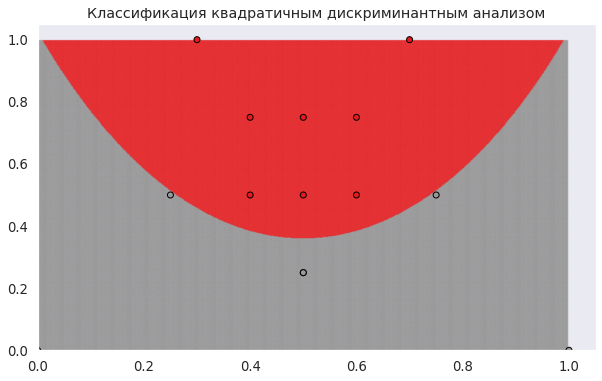

a_k:
array([[0.5    , 0.71875],
       [0.5    , 0.25   ]])
матрицы ковариаций:
[array([[0.01714286, 0.        ],
       [0.        , 0.04352679]]),
 array([[0.125, 0.   ],
       [0.   , 0.05 ]])]
pi_k:
array([0.57142857, 0.42857143])


In [59]:
X = [[0.25, 0.5], [0.5, 0.25], [0, 0], [1, 0], [0.5, 0.25], [0.5, 0.75], [0.5, 0.5], [0.4, 0.75], [0.4, 0.5], [0.6, 0.75], [0.6, 0.5], [0.75, 0.5], [0.3 ,1], [0.7 ,1]]
y = [1, 1, 1, 1, 1,0, 0, 0, 0, 0, 0, 1, 0 ,0]
X = pd.DataFrame(X)
model = QuadraticDiscriminantAnalysis(store_covariance=True)
model.fit(X, y)
grid_labels = model.predict(grid.reshape((2,  h*w)).T).reshape(h, w)
plt.figure(figsize=(10, 6))
plt.pcolormesh(grid[0], grid[1], grid_labels, 
               shading='gouraud', cmap='Set1', alpha=0.2)
plt.scatter(X[0], X[1], c=y, 
            cmap='Set1', edgecolors='black')
plt.title('Классификация квадратичным дискриминантным анализом')
plt.show()
print('a_k:')
pp( model.means_)
print('матрицы ковариаций:')
pp(model.covariance_)
print('pi_k:')
pp(model.priors_)

P(y = 0) = 8/14, P(y = 1) = 6/14

гипербола

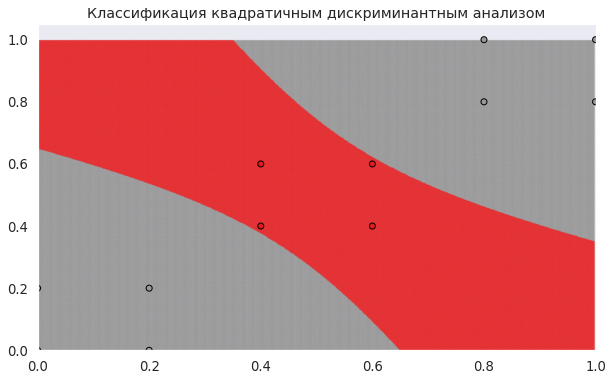

a_k:
array([[0.5, 0.5],
       [0.5, 0.5]])
матрицы ковариаций:
[array([[0.01333333, 0.        ],
       [0.        , 0.01333333]]),
 array([[0.19428571, 0.18285714],
       [0.18285714, 0.19428571]])]
pi_k:
array([0.33333333, 0.66666667])


In [60]:
X = [[0,0], [0.2,0], [0,0.2], [0.2,0.2], [0.4,0.4], [0.6,0.6], [0.4,0.6], [0.6,0.4], [1,1], [1,0.8], [0.8,1], [0.8,0.8]]
y = [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
X = pd.DataFrame(X)
model = QuadraticDiscriminantAnalysis(store_covariance=True)
model.fit(X, y)
grid_labels = model.predict(grid.reshape((2, h*w)).T).reshape(h, w)
plt.figure(figsize=(10, 6))
plt.pcolormesh(grid[0], grid[1], grid_labels, 
               shading='gouraud', cmap='Set1', alpha=0.2)
plt.scatter(X[0], X[1], c=y, 
            cmap='Set1', edgecolors='black')
plt.xlim((0,1))
plt.title('Классификация квадратичным дискриминантным анализом')
plt.show()
print('a_k:')
pp( model.means_)
print('матрицы ковариаций:')
pp(model.covariance_)
print('pi_k:')
pp(model.priors_)